# Week 9 - Multivariate Analysis, part 2

# 1. Lesson - no lesson this week

# 2. Weekly graph question

The graph below plots the first two principal component scores in a scatter plot.  What can be said about the three outliers in the upper left corner of the graph?  Is their first principal component score high or low?  What about their second principal component score?  What does that mean about their values in series_1, series_2, and series_3?  It seems to me that you can say something about series_3 (what can you say?) but you may have a harder time saying something about series_1 and series_2, and an almost impossible time saying anything about the relative values of series_1 and series_2.  Why is that?  How are series_1 and series_2 related, according to how they were created?  If you like, try drawing a pairplot for all three series and see what you get.

Overall, what are the advantages and disadvantages of the graph below?  Does it show anything interesting?

In [3]:
import numpy as np
import pandas as pd
from sklearn import decomposition
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from scipy.stats import zscore


from datetime import datetime, timedelta
import kagglehub
import os


explained_variance_ratio:
[0.79916477 0.18990532 0.01092991]
pca3.components_:
[[ 0.26541493  0.30096233  0.91595665]
 [ 0.60337553  0.6891417  -0.40127506]
 [ 0.75199261 -0.65917023 -0.00131519]]


Text(0, 0.5, 'Second Principal Component Score')

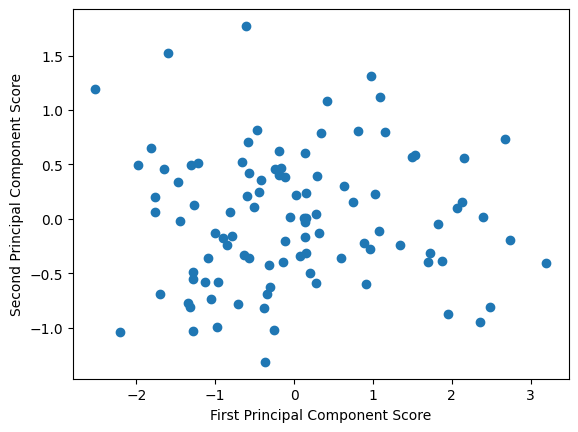

In [2]:

np.random.seed(0)
num_points = 100
series_1 = np.random.normal(loc = 2, scale = 0.5, size = num_points)
series_2 = series_1 * (1 + np.random.normal(loc = 0, scale = 0.1, size = num_points))
series_3 = series_1 * (1 + np.random.normal(loc = 0, scale = 0.5, size = num_points))
df = pd.DataFrame({'ser1': series_1, 'ser2': series_2, 'ser3': series_3})
df = df - df.mean() # set mean to zero, so we don't have to subtract mean from the principal component scores

pca3 = decomposition.PCA(n_components = 3)
pca3.fit(df)
print(f"explained_variance_ratio:\n{pca3.explained_variance_ratio_}")
print(f"pca3.components_:\n{pca3.components_}")

first_principal_component_score = df.dot(pca3.components_[0])
second_principal_component_score = df.dot(pca3.components_[1])
plt.scatter(first_principal_component_score, second_principal_component_score)
plt.xlabel("First Principal Component Score")
plt.ylabel("Second Principal Component Score")

✔️ *What can be said about the three outliers in the upper left corner of the graph?*

These three data points:
- Have unusually low scores on the first principal component (PC1).
- Have high scores on the second principal component (PC2).
- This means they represent unusual combinations of the original variable values, especially in how series_3 compares to series_1 and series_2.

✔️ *Is their first principal component score high or low?*

Their first principal component score is low (strongly negative), placing them on the far left of the plot.

✔️ *What about their second principal component score?*

Their second principal component score is high (strongly positive), placing them near the top of the plot.

✔️ *What does that mean about their values in series_1, series_2, and series_3?*

From the PCA loadings:
 - PC1 = 0.27 * series_1 + 0.30 * series_2 + 0.92 * series_3

A low PC1 score → low value of series_3, since it contributes the most.
 - PC2 = 0.60 * series_1 + 0.69 * series_2 - 0.40 * series_3

A high PC2 score → high values of series_1 and series_2, low value of series_3.

So overall, for those three outliers:
- series_3 is very low
- series_1 and series_2 are moderate to high

✔️ *Can we say something about series_3?*

Yes — confidently. Because series_3 has the largest weight (0.92) in PC1, and a negative weight in PC2, the outliers' combination of low PC1 and high PC2 suggests they have significantly low values in series_3.

✔️ *Can we say something about series_1 and series_2?*

We can say that:
 - They are not unusually low, and are likely moderate to high.
 - But it’s hard to separate their individual effects in PCA space.

✔️ *Can we say anything about the relative values of series_1 and series_2?*

Almost impossible. Because:
 - series_1 and series_2 are highly correlated.
 - PCA combines them into the same direction (shared variance).
 - They both contribute similarly to PC1 and PC2.

PCA cannot distinguish between series_1 and series_2 unless there’s a clear difference, which isn’t the case here due to how they were generated.

✔️ *How are series_1 and series_2 related, according to how they were created?*

- series_2 is a noisy version of series_1.
- So they are strongly positively correlated.
- Their relationship is almost linear, with slight variation due to the small noise.

✔️ *Try drawing a pairplot for all three series and see what you get*
A pairplot reveals:
 - A strong linear relationship between series_1 and series_2.
 - A wider spread between series_3 and the others, due to larger noise.
 - The three outliers will appear as points with unusually low series_3.

✔️ *Overall, what are the advantages and disadvantages of the graph below?*

**Advantages:**
  - Reduces 3D data to 2D with minimal loss of variance (only ~1% lost).
  - Clearly identifies outliers (like the three points in the upper left).
  - Helps detect overall structure or clusters in data.
  - Good for visualizing relationships and spread in compressed form.

**Disadvantages:**
  - Hard to interpret what the axes mean without inspecting PCA components.
  - Does not show individual variable relationships clearly.
  - Loses original variable scale and identity.
  - Cannot show relative contributions of similar or correlated features (like series_1 vs series_2).

✔️ *Does it show anything interesting?*

Yes — it reveals:
- The presence of three strong outliers with unusually low values in one variable (series_3).
- A tight cluster of the rest of the data — showing that most points follow a consistent structure.
- That PCA can summarize most of the variance in just 2 components (~99%).

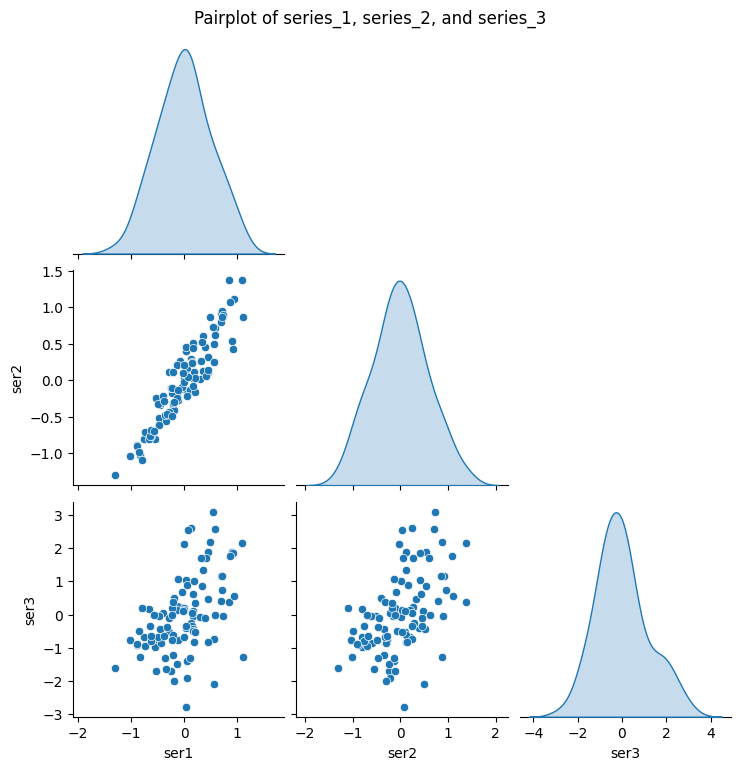

In [3]:

# Plot pairplot
sns.pairplot(df, corner=True, diag_kind="kde")
plt.suptitle("Pairplot of series_1, series_2, and series_3", y=1.02)
plt.show()

# 3. Working on your datasets

This week, you will do the same types of exercises as last week, but you should use your own datasets that you found last semester.

Here are some types of analysis you can do:
Draw heatmaps.

Draw bubble plots.

Perform Principal Component Analysis to find out the directions in which the data varies.  Can you represent the data using only its projection onto its first principal component, using the methods described in Week 8?  How much of the variance would this capture?

Try performing linear regression analysis using different sets of features.  Which features seem most likely to be useful to predict other features?

Conclusions:
Explain what conclusions you would draw from this analysis: are the data what you expect? Are the data likely to be usable? If the data are not useable, find some new data!

Do you see any outliers? (Data points that are far from the rest of the data).

Does the Principal Component Analysis suggest a way to represent the data using fewer dimensions than usual - using its first one or two principal component scores, perhaps?

Try using your correlation information from previous weeks to help choose features for linear regression.

In [7]:
# set variables
kaggle_dataset_path = "khusheekapoor/vehicle-insurance-fraud-detection"
kaggle_dataset_file_name = "carclaims.csv"
print(f"Path to kaggle dataset: {kaggle_dataset_path}")
print(f"Kaggle dataset file name: {kaggle_dataset_file_name}")

# download the data set
kaggle_dataset_local_path = kagglehub.dataset_download(kaggle_dataset_path)
print(f"Path to downloaded file: {kaggle_dataset_local_path}")

# read csv file to pandas dataframe
kaggle_dataset_local_path_to_file = os.path.join(kaggle_dataset_local_path, kaggle_dataset_file_name)
kaggle_dataset_raw = pd.read_csv(kaggle_dataset_local_path_to_file)

# copy dataframe for EDA
dataset = kaggle_dataset_raw.drop(columns=['PolicyNumber','RepNumber']).copy()

# show top rows
dataset.head()


Path to kaggle dataset: khusheekapoor/vehicle-insurance-fraud-detection
Kaggle dataset file name: carclaims.csv
Path to downloaded file: C:\Users\serge\.cache\kagglehub\datasets\khusheekapoor\vehicle-insurance-fraud-detection\versions\1


,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,...,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange-Claim,NumberOfCars,Year,BasePolicy,FraudFound
0,Dec,5,Wednesday,Honda,Urban,Tuesday,Jan,1,Female,Single,...,26 to 30,No,No,External,none,1 year,3 to 4,1994,Liability,No
1,Jan,3,Wednesday,Honda,Urban,Monday,Jan,4,Male,Single,...,31 to 35,Yes,No,External,none,no change,1 vehicle,1994,Collision,No
2,Oct,5,Friday,Honda,Urban,Thursday,Nov,2,Male,Married,...,41 to 50,No,No,External,none,no change,1 vehicle,1994,Collision,No
3,Jun,2,Saturday,Toyota,Rural,Friday,Jul,1,Male,Married,...,51 to 65,Yes,No,External,more than 5,no change,1 vehicle,1994,Liability,No
4,Jan,5,Monday,Honda,Urban,Tuesday,Feb,2,Female,Single,...,31 to 35,No,No,External,none,no change,1 vehicle,1994,Collision,No


In [8]:
# add target feature as integer
dataset['FraudFound_Int'] = dataset['FraudFound'].map({'Yes': 1, 'No': 0})
# Summarize the datasets using describe()
dataset.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
WeekOfMonth,15420.0,2.788586,1.287585,1.0,2.0,3.0,4.0,5.0
WeekOfMonthClaimed,15420.0,2.693969,1.259115,1.0,2.0,3.0,4.0,5.0
Age,15420.0,39.855707,13.492377,0.0,31.0,38.0,48.0,80.0
Deductible,15420.0,407.704280,43.950998,300.0,400.0,400.0,400.0,700.0
DriverRating,15420.0,2.487808,1.119453,1.0,1.0,2.0,3.0,4.0
Year,15420.0,1994.866472,0.803313,1994.0,1994.0,1995.0,1996.0,1996.0
FraudFound_Int,15420.0,0.059857,0.237230,0.0,0.0,0.0,0.0,1.0


#### Draw Heatmaps

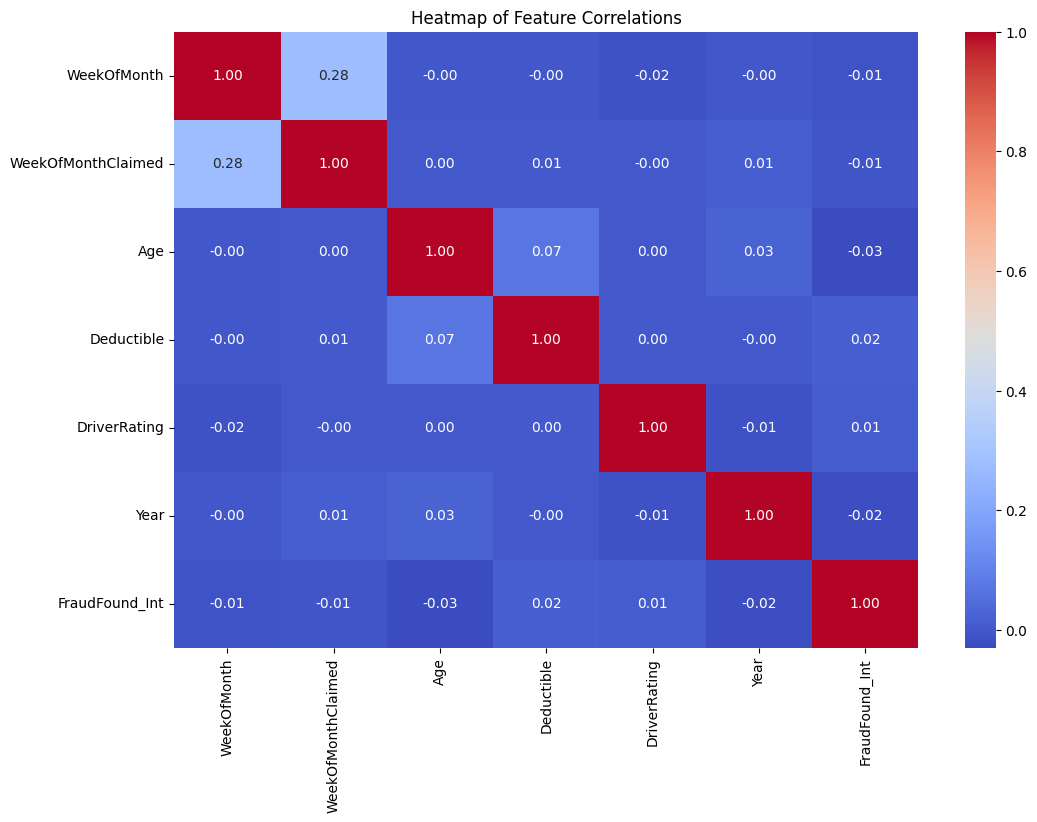

In [9]:
# Compute correlation matrix
correlation_matrix = dataset.corr(numeric_only=True)

# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Heatmap of Feature Correlations")
plt.show()

#### Draw Bubble Plots

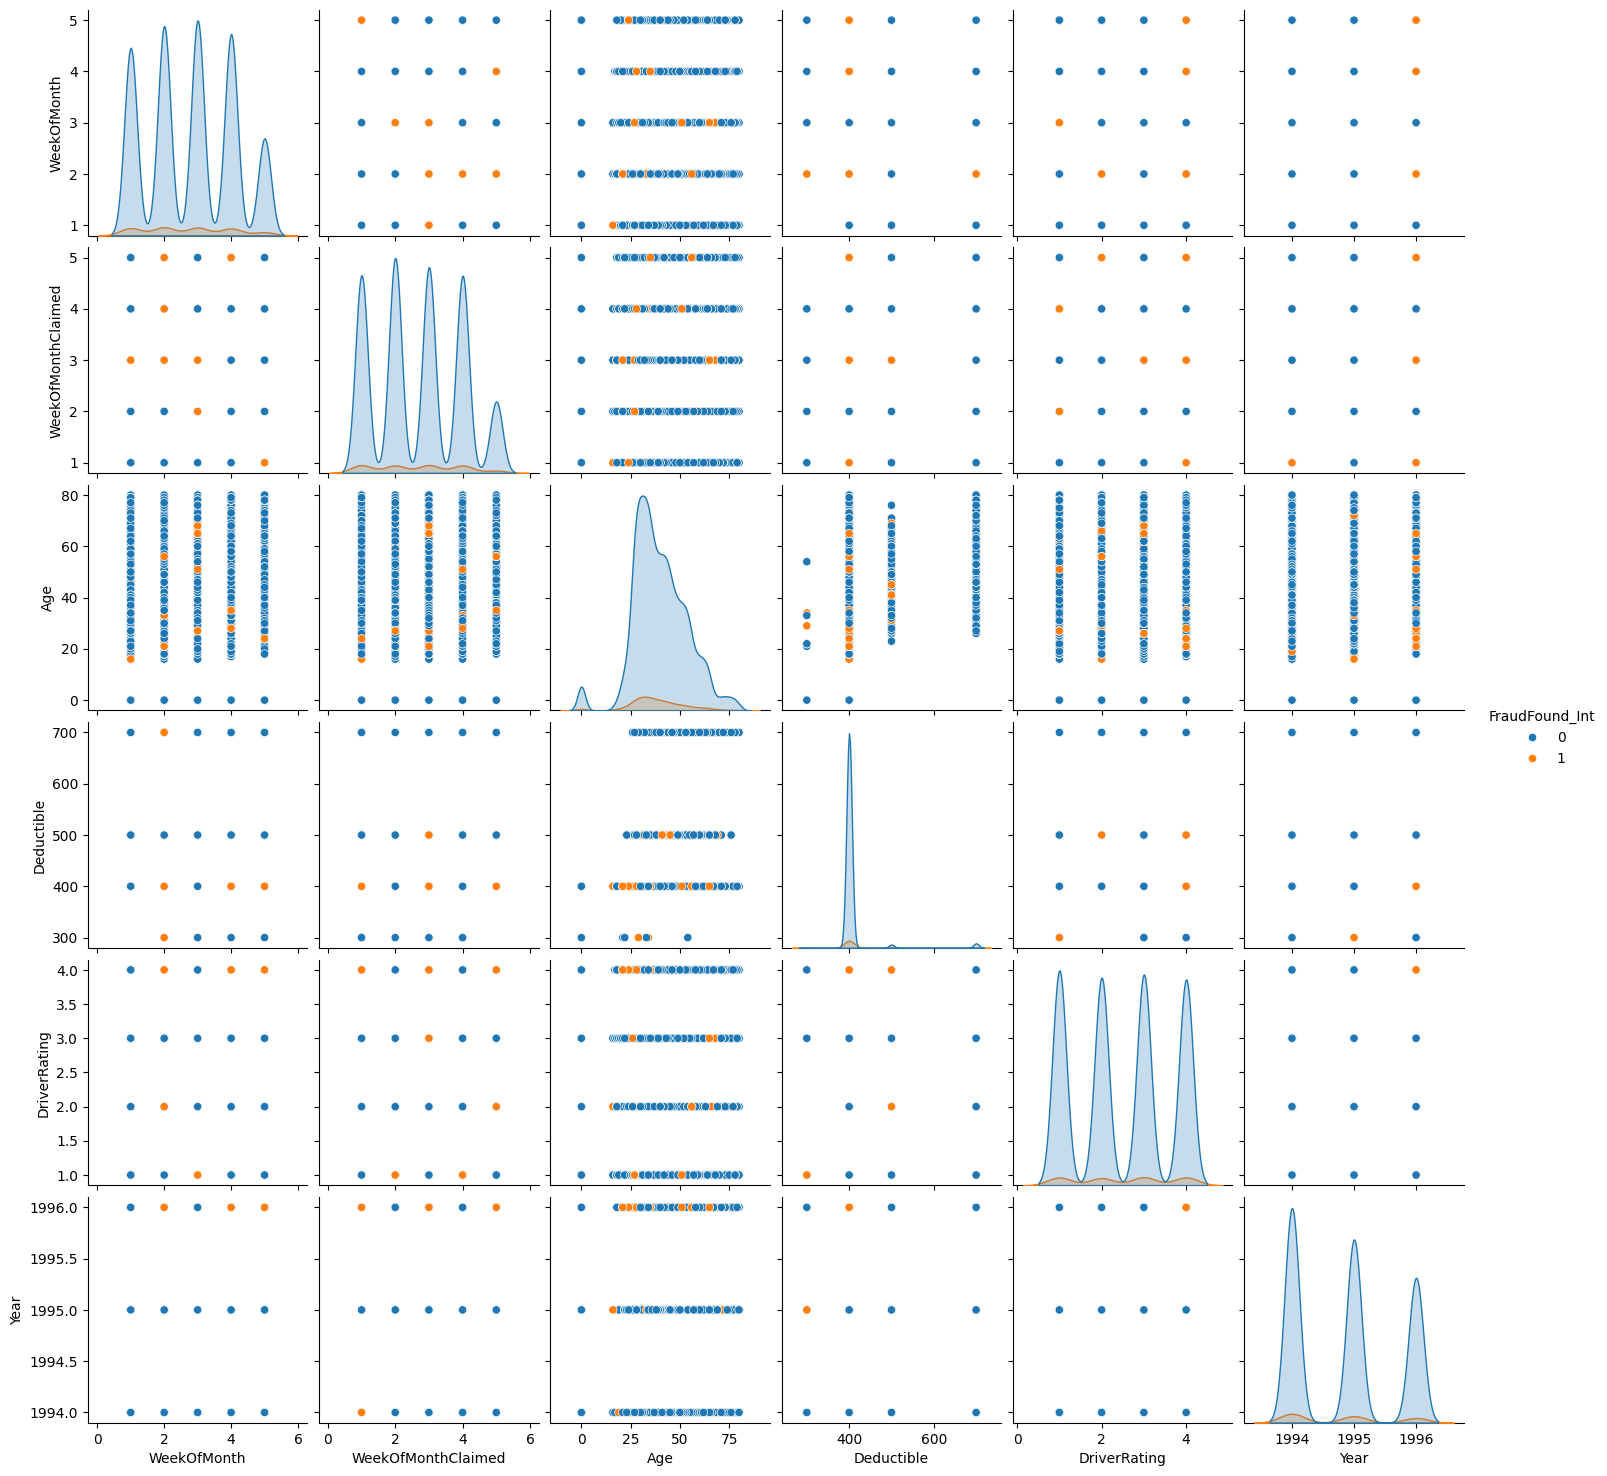

In [11]:
sns.pairplot(dataset, hue="FraudFound_Int")
plt.show()

In [12]:
def scatter_matrix(data, pairs=None, alpha=0.6, figsize=(6, 4)):
    from itertools import combinations

    if pairs is None:
        cols = data.select_dtypes(include='number').columns.tolist()
        pairs = list(combinations(cols, 2))

    print(f"Creating {len(pairs)} scatter plots...")

    for x_col, y_col in pairs:
        plt.figure(figsize=figsize)
        sns.scatterplot(data=data, x=x_col, y=y_col, alpha=alpha)
        plt.title(f"{y_col} vs {x_col}")
        plt.tight_layout()
        plt.grid(True)
        plt.show()


In [13]:
# Custom pairs
custom_pairs = [
    ('age', 'policy_annual_premium'),
    ('age', 'months_as_customer'),
    ('months_as_customer', 'total_claim_amount'),
    ('total_claim_amount','vehicle_claim'),
    ('total_claim_amount','property_claim'),
    ('total_claim_amount','injury_claim'),
]

scatter_matrix(dataset, pairs=custom_pairs)


Creating 6 scatter plots...


ValueError: Could not interpret value `age` for `x`. An entry with this name does not appear in `data`.

<Figure size 600x400 with 0 Axes>

#### Perform PCA

Variance captured by the 1st principal component: 0.2204


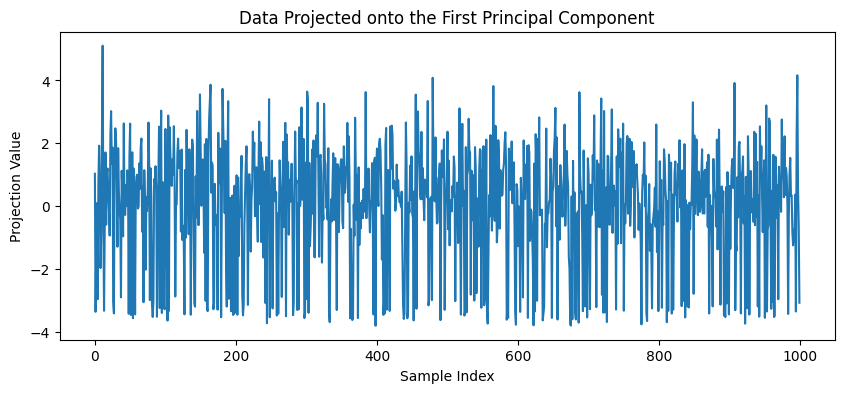

In [ ]:
# Select only numeric columns
numeric_cols = dataset.select_dtypes(include='number').dropna(axis=1)

# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(numeric_cols)

# PCA
pca = PCA()
pca_data = pca.fit_transform(scaled_data)

# Variance explained
explained_variance = pca.explained_variance_ratio_

# Project onto the first principal component
pca1_projection = pca_data[:, 0]

print(f"Variance captured by the 1st principal component: {explained_variance[0]:.4f}")

# Plot the projection
plt.figure(figsize=(10, 4))
plt.plot(pca1_projection)
plt.title("Data Projected onto the First Principal Component")
plt.xlabel("Sample Index")
plt.ylabel("Projection Value")
plt.show()


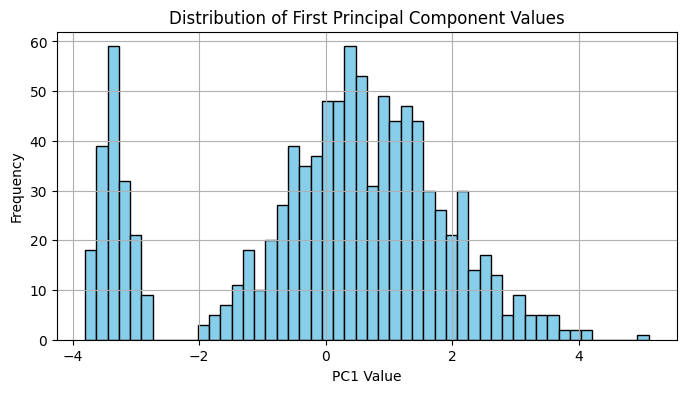

In [ ]:
plt.figure(figsize=(8, 4))
plt.hist(pca1_projection, bins=50, color='skyblue', edgecolor='black')
plt.title('Distribution of First Principal Component Values')
plt.xlabel('PC1 Value')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


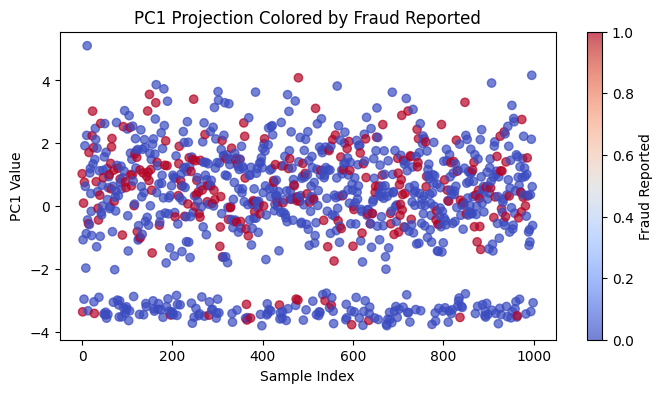

In [ ]:
plt.figure(figsize=(8, 4))
plt.scatter(range(len(pca1_projection)), pca1_projection, 
            c=dataset['fraud_reported'].map({'Y': 1, 'N': 0}), cmap='coolwarm', alpha=0.7)
plt.title("PC1 Projection Colored by Fraud Reported")
plt.xlabel("Sample Index")
plt.ylabel("PC1 Value")
plt.colorbar(label='Fraud Reported')
plt.show()


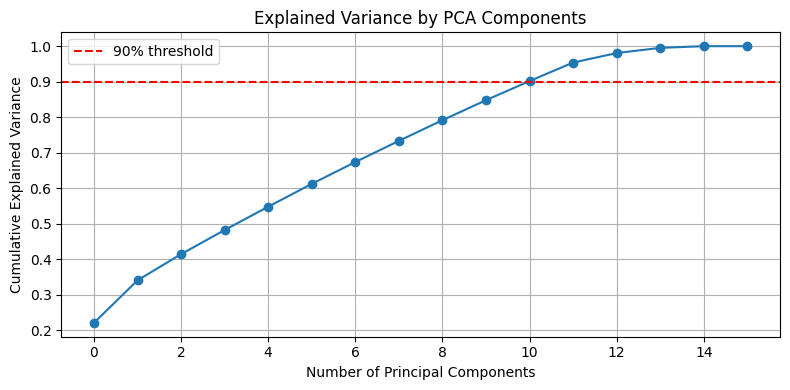

In [ ]:
plt.figure(figsize=(8, 4))
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='o')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.axhline(y=0.90, color='r', linestyle='--', label='90% threshold')
plt.title('Explained Variance by PCA Components')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


In [ ]:
# Apply PCA with 2 components
pca_2d = PCA(n_components=2)
pca_result = pca_2d.fit_transform(scaled_data)

# Explained variance
print(f"Explained variance by PC1 and PC2: {pca_2d.explained_variance_ratio_}")
print(f"Cumulative variance: {pca_2d.explained_variance_ratio_.sum():.4f}")

Explained variance by PC1 and PC2: [0.22037834 0.11986894]
Cumulative variance: 0.3402


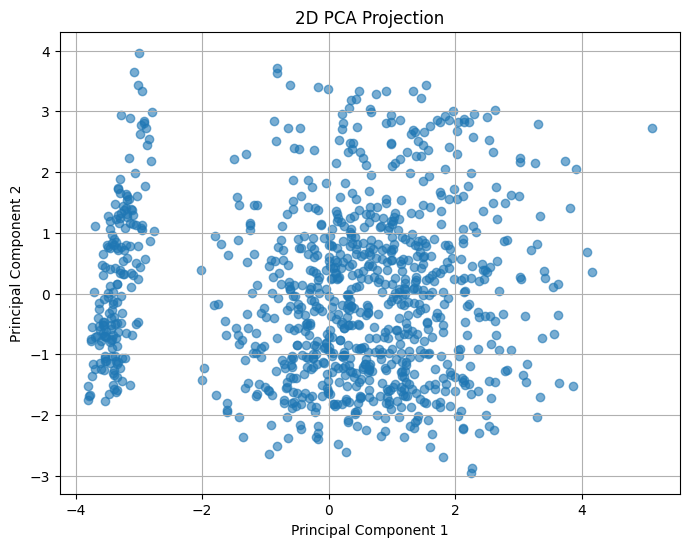

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(pca_result[:, 0], pca_result[:, 1], alpha=0.6)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('2D PCA Projection')
plt.grid(True)
plt.show()


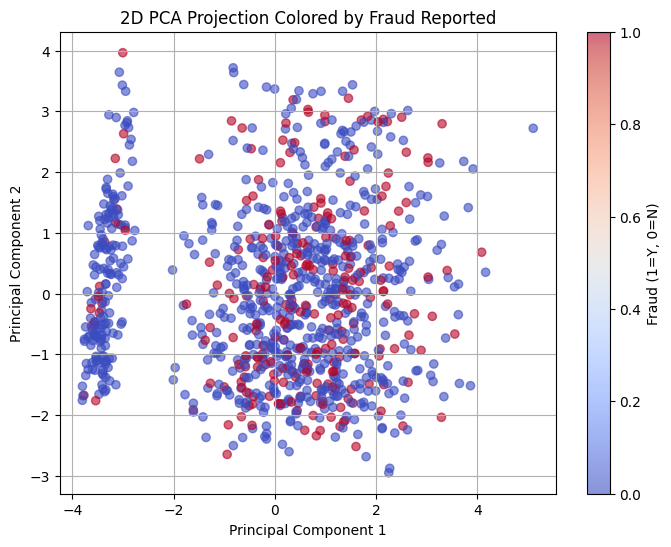

In [ ]:
labels = dataset['fraud_reported'].map({'Y': 1, 'N': 0})

plt.figure(figsize=(8, 6))
scatter = plt.scatter(pca_result[:, 0], pca_result[:, 1], 
                      c=labels, cmap='coolwarm', alpha=0.6)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('2D PCA Projection Colored by Fraud Reported')
plt.grid(True)
plt.colorbar(label='Fraud (1=Y, 0=N)')
plt.show()


#### Detect outliers

Outlier counts per column:
policy_annual_premium     3
umbrella_limit           15
capital-loss              1
property_claim            1
dtype: int64


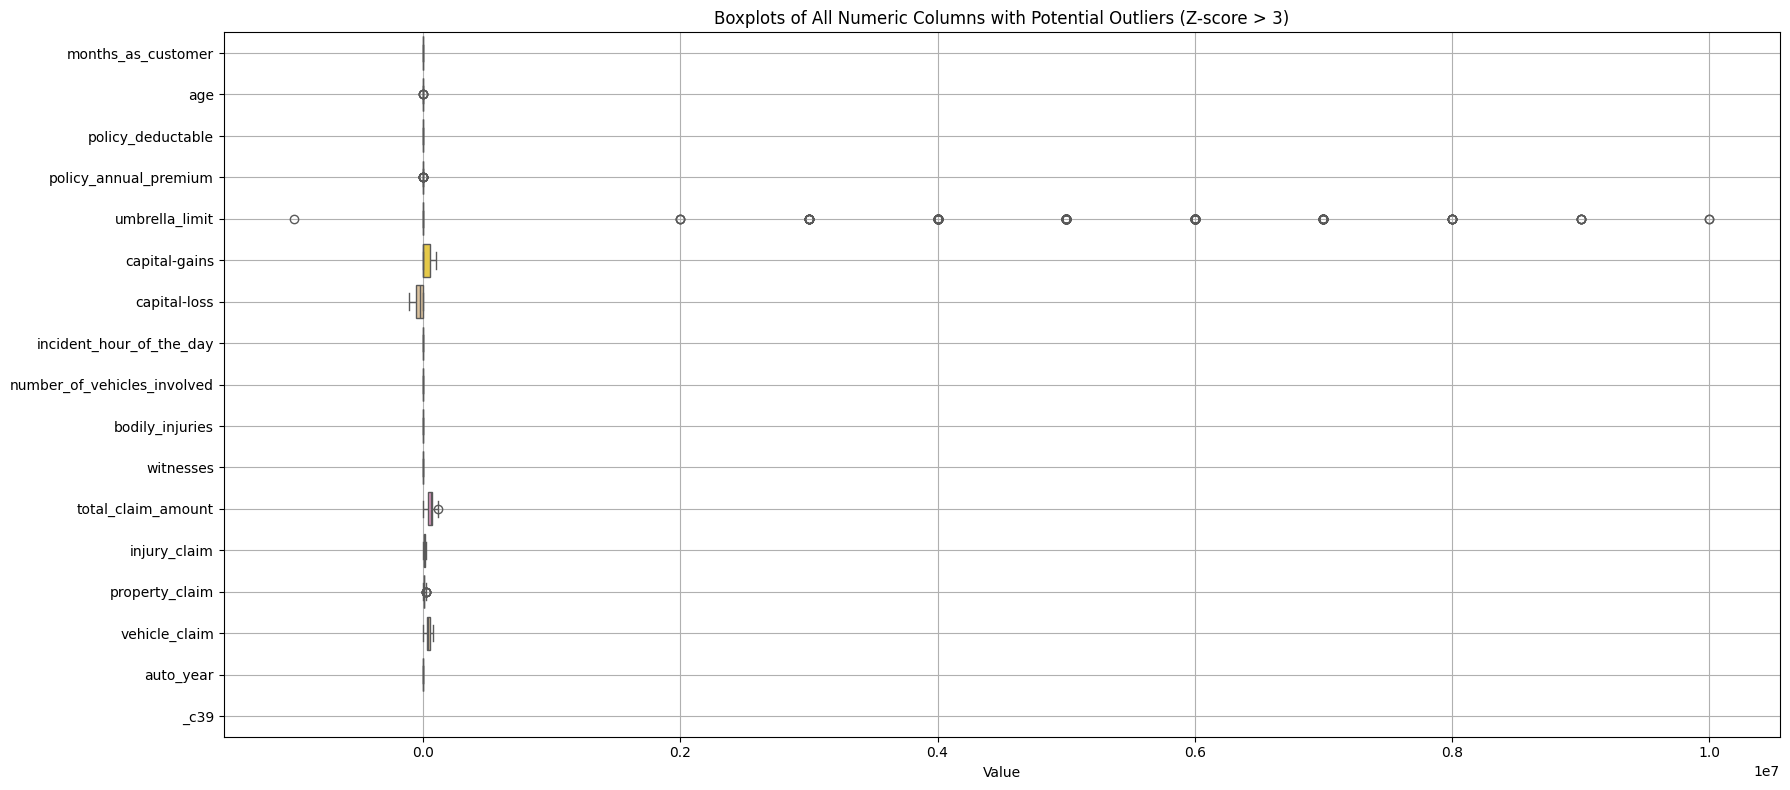

In [ ]:
# Select numeric columns
numeric_df = dataset.select_dtypes(include='number').copy()

# Compute Z-scores
z_scores = numeric_df.apply(zscore)

# Identify outliers (Z-score > 3 or < -3)
outlier_mask = (z_scores.abs() > 3)
outlier_counts = outlier_mask.sum()

print("Outlier counts per column:")
print(outlier_counts[outlier_counts > 0])

# Plot all numeric columns in one big boxplot chart
plt.figure(figsize=(18, 8))
sns.boxplot(data=numeric_df, orient="h", palette="Set2")
plt.title("Boxplots of All Numeric Columns with Potential Outliers (Z-score > 3)")
plt.xlabel("Value")
plt.grid(True)
plt.tight_layout()
plt.show()


General Observations:

- Most features are heavily skewed to the left, meaning most data points are concentrated at lower values, with a few much larger values stretching far to the right.
- Many outliers are visible as dots outside the whiskers — especially in features like: total_claim_amount, vehicle_claim, injury_claim, umbrella_limit.
- Some features are close to binary or low cardinality, e.g. witnesses, number_of_vehicles_involved, bodily_injuries, and capital-gains/loss — these show up as narrow boxes or multiple stacked lines, which is expected for categorical or low-value-count numeric fields.

Feature-by-Feature Highlights:
- umbrella_limit
  - Displays regular large step-like jumps. May reflect policy levels; high outliers could indicate special-case or VIP policies.
- total_claim_amount	
  - Has clear right-skew with outliers — expected in claims data. Large values could be genuine, but worth further checking (especially for fraud detection).
- vehicle_claim, injury_claim, property_claim	
  - Also show right-skew with many outliers. These are components of total claims — outliers could be natural or suspicious.
- policy_annual_premium	
  - Shows some moderate outliers — may indicate premium anomalies worth examining.
  

In [ ]:
high_claims = dataset[dataset['total_claim_amount'] > dataset['total_claim_amount'].quantile(0.99)]
display(high_claims[['total_claim_amount', 'fraud_reported']])


,total_claim_amount,fraud_reported
11,114920,N
149,112320,Y
163,107900,Y
189,101860,N
458,103560,N
479,104610,Y
565,108030,N
718,105820,N
733,105040,N
996,108480,N


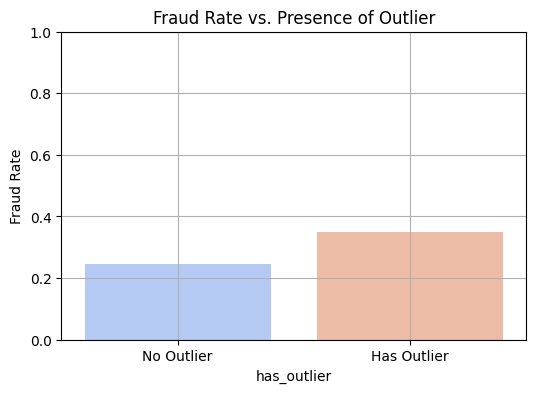

In [ ]:
# Boolean DataFrame: True if any feature has a Z-score > 3
outlier_mask = (z_scores.abs() > 3)

# Flag rows with any extreme outlier
dataset['has_outlier'] = outlier_mask.any(axis=1)
# Convert fraud_reported to binary
dataset['fraud_flag'] = dataset['fraud_reported'].map({'Y': 1, 'N': 0})

# Group by outlier flag
fraud_stats = dataset.groupby('has_outlier')['fraud_flag'].agg(['count', 'sum', 'mean'])
fraud_stats.columns = ['Total Records', 'Fraud Cases', 'Fraud Rate']

plt.figure(figsize=(6, 4))
sns.barplot(
    data=fraud_stats.reset_index(),
    x='has_outlier',
    y='Fraud Rate',
    hue='has_outlier',            # add hue here
    palette='coolwarm',
    legend=False                  # remove the legend (since hue is same as x)
)
plt.xticks([0, 1], ['No Outlier', 'Has Outlier'])
plt.ylabel("Fraud Rate")
plt.title("Fraud Rate vs. Presence of Outlier")
plt.ylim(0, 1)
plt.grid(True)
plt.show()

- Outliers correlate with fraudulent claims.
- Fraudulent claims might involve exaggerated injuries, property damage, or vehicle costs, which show up as numeric outliers.
- This finding supports the idea that outlier detection can serve as a useful feature or flag in your fraud prediction model.

In [ ]:
outlier_counts_by_feature = outlier_mask[dataset['fraud_flag'] == 1].sum().sort_values(ascending=False)
print("Most common outlier features in fraud cases:")
print(outlier_counts_by_feature.head())

dataset['n_outlier_features'] = outlier_mask.sum(axis=1)
suspicious_cases = dataset.sort_values('n_outlier_features', ascending=False)

Most common outlier features in fraud cases:
umbrella_limit           6
policy_annual_premium    1
months_as_customer       0
witnesses                0
auto_year                0
dtype: int64


#### Perform Linear Regression Analysis

We'll use linear regression to identify which features help predict others. 

Below we are predicting `total_claim_amount` using other numeric features to uncover:

- Which features are linked to large payouts.
- Which of those might be red flags if combined with fraud labels.

In [ ]:
# Drop target from features
target = 'total_claim_amount'
# Highly correlated features with target:
data_leakage_columns=['vehicle_claim', 'property_claim', 'injury_claim']

columns_to_drop = [target]+ data_leakage_columns

features = numeric_cols.drop(columns=columns_to_drop)

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(features, numeric_cols[target], test_size=0.3, random_state=42)

# Linear regression model
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Evaluate
r2 = r2_score(y_test, y_pred)
print(f"R² score for predicting '{target}' using numeric features: {r2:.4f}")

# Feature importance (coefficients)
importance = pd.Series(model.coef_, index=features.columns).sort_values(ascending=False)
print("\nFeature importance:")
print(importance)


R² score for predicting 'total_claim_amount' using numeric features: 0.1132

Feature importance:
number_of_vehicles_involved    5515.304012
bodily_injuries                 867.165973
incident_hour_of_the_day        704.662615
months_as_customer               23.472259
policy_annual_premium             3.227655
umbrella_limit                   -0.000469
capital-gains                    -0.027521
capital-loss                     -0.041780
policy_deductable                -0.331492
age                            -272.410323
auto_year                      -287.527945
witnesses                      -723.449820
dtype: float64


Top Positive  Contributors:
- number_of_vehicles_involved
  - More vehicles → more damage → bigger claims → potential fraud flag if exaggerated.
- bodily_injuries	
  - High injuries → high claims → commonly exploited in fraudulent claims.
- incident_hour_of_the_day	
  - Certain times (nighttime, off-hours) may see more suspicious activity.
- months_as_customer	
  - Longer customers may file bigger claims (or may be trusted more) — worth exploring.

These features have meaningful and intuitive relationships with claim amount.

Top Negative Contributors:
- witnesses		
  - More witnesses → lower payouts → may deter fraud. Fewer witnesses could raise suspicion.
- auto_year		
  - Newer cars → safer → lower damage → might be harder to inflate claims.
- age		
  - Older customers = more cautious? Younger policyholders might be higher fraud risk.



#### Conclusions

✔️ *Are the data what you expect? Are the data likely to be usable?*

- The data looks structurally usable.
- Some features (like vehicle_claim, property_claim, etc.) were perfectly correlated with the target before — suggesting internal consistency (good) but also potential for data leakage (handled).
- Cleaned dataset behaves reasonably: relationships make logical sense (e.g., injuries, multiple vehicles drive up claim amounts).
- Data is usable for modeling — we just need to be cautious about leakage and interpretability.



# 4. Storytelling With Data plot

Reproduce any graph of your choice in p. 136-150 of the Storytelling With Data book as best you can. ("The power of super-categories" to the end of chapter 5). You do not have to get the exact data values right, just the overall look and feel.

Figure 5.9 Use words to make the graph accessible on page 144.

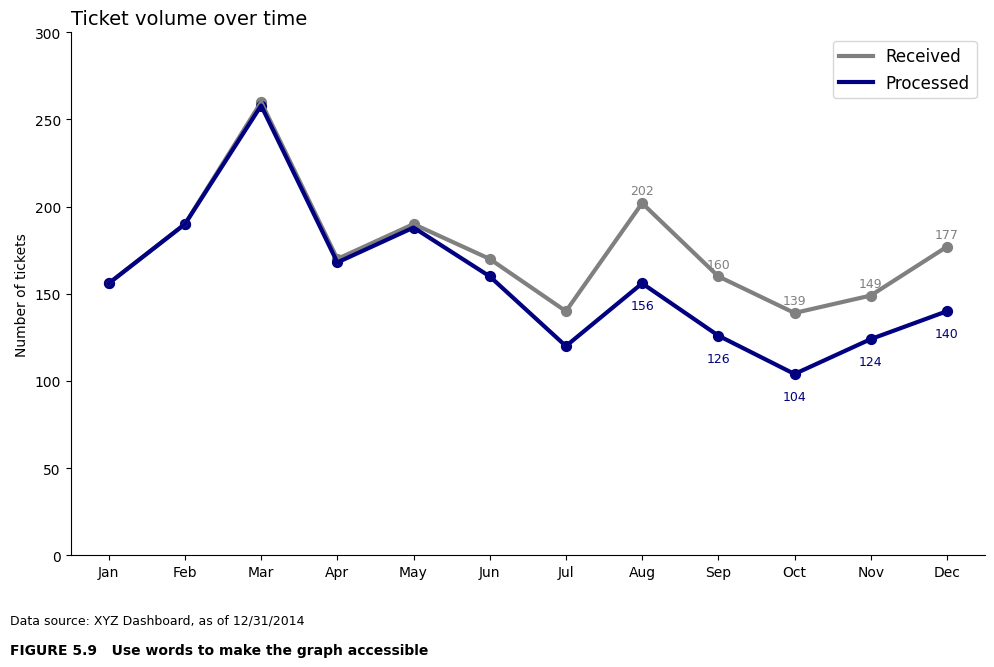

In [ ]:
# Data from the graph
months = [
    'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
    'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'
]
received = [156, 190, 260, 170, 190, 170, 140, 202, 160, 139, 149, 177]
processed = [156, 190, 258, 168, 188, 160, 120, 156, 126, 104, 124, 140]

# Create the plot
fig, ax = plt.subplots(figsize=(10, 6))

# Plot lines
ax.plot(months, received, color='gray', linewidth=3, label='Received')
ax.plot(months, processed, color='navy', linewidth=3, label='Processed')

# Add dots/balls on each point
ax.scatter(months, received, color='gray', s=50)
ax.scatter(months, processed, color='navy', s=50)

# Add data labels only if values differ
for i, (r, p) in enumerate(zip(received, processed)):
    if abs(r - p ) > 20:
        ax.text(i, r + 5, str(r), ha='center', fontsize=9, color='gray')
        ax.text(i, p - 15, str(p), ha='center', fontsize=9, color='navy')
    # elif r == p:
        #ax.text(i, p - 15, str(p), ha='center', fontsize=9, color='navy')
# Set title and labels
ax.set_title('Ticket volume over time', fontsize=14, loc='left')
ax.set_ylabel('Number of tickets')
ax.set_ylim(0, 300)
ax.legend(loc='upper right', fontsize=12)
ax.grid(False)

# Remove top and right borders
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Fix x-axis alignment
ax.set_xlim(-0.5, len(months) - 1 + 0.5)
ax.set_xticks(range(len(months)))
ax.set_xticklabels(months)

# Add source and figure caption
plt.figtext(0.01, -0.05, "Data source: XYZ Dashboard, as of 12/31/2014", fontsize=9, ha="left")
plt.figtext(0.01, -0.1, "FIGURE 5.9   Use words to make the graph accessible", fontsize=10, ha="left", fontweight='bold')

plt.tight_layout()
plt.show()
